# **Data Processing Pipeline**

## **Necessary Libraries**

In [204]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **Read the Data**

The data used is titanic data set and is read from the github.

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/titanic.csv')

**View sample data**

In [102]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Data Pre-processing**

### **1. View Data Summaries**

**df.describe()** provides the statistical summary of the data.

By default it returns the summary for all the numeric columns.

When 'include='all'' is passed as an argument to it, the summary is returned for all columns (numeric and categorical)

In [12]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### **2. Remove Duplicates rows and columns**

In [ ]:
# Print the duplicated rows
df[df.duplicated(keep=False)].sort_values(by = ['fare','embark_town'], ascending = [1,1]).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
277,0,2,male,NaN,0,0,0.000,S,Second,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.000,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.000,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.000,S,Second,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.000,S,Second,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.000,S,Second,man,True,NaN,Southampton,no,True
784,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.225,C,Third,man,True,NaN,Cherbourg,no,True
354,0,3,male,NaN,0,0,7.225,C,Third,man,True,NaN,Cherbourg,no,True


In [104]:
count_before_duplicate_removal = df.shape[0]
print(f"Number of records before removing duplicates: {count_before_duplicate_removal}")

Number of records before removing duplicates: 891


In [105]:
df = df.drop_duplicates()

In [111]:
count_after_duplicate_removal = df.shape[0]
print(f"Number of records after removing duplicates: {count_after_duplicate_removal}\n")

print(f"Percentage of records that were duplicated: {(count_before_duplicate_removal - count_after_duplicate_removal)/count_before_duplicate_removal * 100:.2f}%")

Number of records after removing duplicates: 784

Percentage of records that were duplicated: 12.01%


If you observe the data columns who and adult_male all convey the same information as combination of age and sex.

We'll retain any one of the combination.

Here Age and Sex is retained!!



In [113]:
df[(df['sex'] == 'male') & (df['adult_male'] == False)].sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
480,0,3,male,9.00,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
824,0,3,male,2.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
340,1,2,male,2.00,1,1,26.0000,S,Second,child,False,F,Southampton,yes,False
751,1,3,male,6.00,0,1,12.4750,S,Third,child,False,E,Southampton,yes,False
50,0,3,male,7.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
869,1,3,male,4.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
63,0,3,male,4.00,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
125,1,3,male,12.00,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False


The below check confirms that the embark_town and embarked column are duplicates as well.

We'll retain embark_town.

Although, whether this column is necessary or not for data modeling is decided during feature selection.

In [116]:
df[df['embark_town'].str[0].str.upper() != df['embarked'].str.upper()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


The below cells show that pclass and class are duplicated as well.

We'll retain pclass in this case.

In [118]:
print(f"Unique values in 'class' column: {df['class'].unique()}")

Unique values in 'class' column: ['Third' 'First' 'Second']


In [121]:
mapping = {'First': 1, 'Second': 2, 'Third': 3}
df['derived_pclass'] = df['class'].map(mapping)

print(f"Mismatch in pclass and derived_pclass: \n {df[df['pclass'] != df['derived_pclass']]}")

Mismatch in pclass and derived_pclass: 
 Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone, derived_pclass]
Index: []


The below cell output show that alive and survived are duplicated as well. Therefore we remove alive column in this case

In [ ]:
df[((df['alive'] == 'no') & (df['survived'] == 1)) | ((df['alive'] == 'yes') & (df['survived'] == 0))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,derived_pclass


In [125]:
# Remove who, adult_male, embarked, pclass, and alive columns
df_deduplicated = df.drop(columns = ['who', 'adult_male', 'embarked', 'alive', 'derived_pclass', 'pclass'])

In [126]:
df_deduplicated.head(10)

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,True
5,0,male,NaN,0,0,8.4583,Third,NaN,Queenstown,True
6,0,male,54.0,0,0,51.8625,First,E,Southampton,True
7,0,male,2.0,3,1,21.0750,Third,NaN,Southampton,False
8,1,female,27.0,0,2,11.1333,Third,NaN,Southampton,False
9,1,female,14.0,1,0,30.0708,Second,NaN,Cherbourg,False


### **3. Check for missing values**

In [127]:
df_deduplicated.isnull().sum()

survived         0
sex              0
age            106
sibsp            0
parch            0
fare             0
class            0
deck           582
embark_town      2
alone            0
dtype: int64

From the above output it can be seen that, age is a numeric column that contains missing values.

Columns deck, embark_town are categorical and contain missing values.

We'll look at the unique values of those categorical columns mentioned above.

In [128]:
print(f'Unique values present in deck column: {df_deduplicated["deck"].unique()}\n')

print(df_deduplicated.deck.value_counts())

Unique values present in deck column: [nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']

deck
C    59
B    46
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64


In [129]:
print(f'Unique values present in embark_town column: {df_deduplicated["embark_town"].unique()}\n')

print(df_deduplicated.embark_town.value_counts())

Unique values present in embark_town column: ['Southampton' 'Cherbourg' 'Queenstown' nan]

embark_town
Southampton    568
Cherbourg      155
Queenstown      59
Name: count, dtype: int64


In [130]:
df_deduplicated[df_deduplicated.age.isnull()].sample(10)

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
653,1,female,NaN,0,0,7.8292,Third,NaN,Queenstown,True
740,1,male,NaN,0,0,30.0000,First,D,Southampton,True
451,0,male,NaN,1,0,19.9667,Third,NaN,Southampton,False
538,0,male,NaN,0,0,14.5000,Third,NaN,Southampton,True
468,0,male,NaN,0,0,7.7250,Third,NaN,Queenstown,True
55,1,male,NaN,0,0,35.5000,First,C,Southampton,True
524,0,male,NaN,0,0,7.2292,Third,NaN,Cherbourg,True
680,0,female,NaN,0,0,8.1375,Third,NaN,Queenstown,True
375,1,female,NaN,1,0,82.1708,First,NaN,Cherbourg,False
517,0,male,NaN,0,0,24.1500,Third,NaN,Queenstown,True


Percentage of missing values

In [131]:
missing_values_per_columns = df_deduplicated.isnull().sum()/len(df_deduplicated) * 100

overall_missing_values = df_deduplicated.isnull().sum().sum()/df_deduplicated.size * 100

print(f"Percentage of missing values per column:\n{missing_values_per_columns}\n")
print(f"Overall percentage of missing values: {overall_missing_values:.2f}%")

Percentage of missing values per column:
survived        0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
deck           74.234694
embark_town     0.255102
alone           0.000000
dtype: float64

Overall percentage of missing values: 8.80%


From the above result, it can be observed that embark_town column contain very little missing values, so it is safe to drop the rows that contain those missing values or to impute with frequent values.

But age and deck column has 13.52% and 74.23% missing values. 

Age being a crucial feature, the missing values shall be imputed. 
If we drop missing values in Age, we'll lose 1/6th of the total records. Hence we'll impute and retain the missing values in Age.

Deck on the otherhand is a categorical column which has almost 75% of its records missing. Hence it is okay to drop the entire row!!
Imputation on Deck would be highly unreliable.

### **4. Fill missing values**

In [142]:
df1 = df_deduplicated.copy()
df2 = df_deduplicated.__deepcopy__()

In [143]:
# Method 1: Use df.fillna() to fill missing values
drop_cols = df1.columns[df1.isnull().mean() > 0.5]
df1.drop(columns = drop_cols, inplace = True)

df1 = df1.fillna(df1.mean(numeric_only=True))
df1['embark_town'] = df1['embark_town'].fillna(df1['embark_town'].mode()[0])

# Check for missing values after filling
print(f"Missing values in df1 after filling:\n{df1.isnull().sum()}\n")

Missing values in df1 after filling:
survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
embark_town    0
alone          0
dtype: int64



In [144]:
# Method 2: Use SimpleImputer to fill missing values
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

df2.drop(columns = drop_cols, inplace=True)

num_cols = df2.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df2.select_dtypes(include=['object']).columns

df2[num_cols] = imputer_num.fit_transform(df2[num_cols])
df2[cat_cols] = imputer_cat.fit_transform(df2[cat_cols])

print('Missing values in df2 after filling:\n', df2.isnull().sum(), '\n')

Missing values in df2 after filling:
 survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
embark_town    0
alone          0
dtype: int64 



In [145]:
# View the data after filling missing values
df1.head(10)

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.000000,1,0,7.2500,Third,Southampton,False
1,1,female,38.000000,1,0,71.2833,First,Cherbourg,False
2,1,female,26.000000,0,0,7.9250,Third,Southampton,True
3,1,female,35.000000,1,0,53.1000,First,Southampton,False
4,0,male,35.000000,0,0,8.0500,Third,Southampton,True
5,0,male,29.869351,0,0,8.4583,Third,Queenstown,True
6,0,male,54.000000,0,0,51.8625,First,Southampton,True
7,0,male,2.000000,3,1,21.0750,Third,Southampton,False
8,1,female,27.000000,0,2,11.1333,Third,Southampton,False
9,1,female,14.000000,1,0,30.0708,Second,Cherbourg,False


In [146]:
df_handled_missing_values = df1.copy()

df_handled_missing_values['age'] = df_handled_missing_values['age'].astype(int)

print(df_handled_missing_values.head(10))

   survived     sex  age  sibsp  parch     fare   class  embark_town  alone
0         0    male   22      1      0   7.2500   Third  Southampton  False
1         1  female   38      1      0  71.2833   First    Cherbourg  False
2         1  female   26      0      0   7.9250   Third  Southampton   True
3         1  female   35      1      0  53.1000   First  Southampton  False
4         0    male   35      0      0   8.0500   Third  Southampton   True
5         0    male   29      0      0   8.4583   Third   Queenstown   True
6         0    male   54      0      0  51.8625   First  Southampton   True
7         0    male    2      3      1  21.0750   Third  Southampton  False
8         1  female   27      0      2  11.1333   Third  Southampton  False
9         1  female   14      1      0  30.0708  Second    Cherbourg  False


### **5. Normality Distribution**

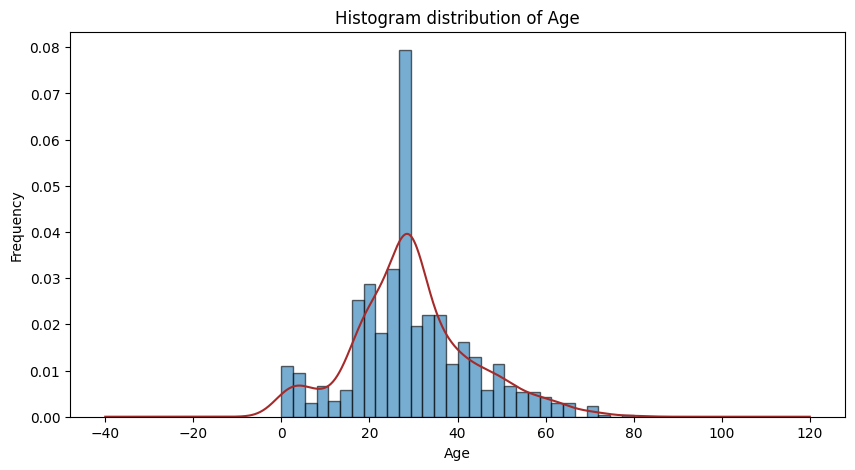

In [147]:
fig, ax = plt.subplots(figsize=(10, 5))
df_handled_missing_values['age'].plot(kind='hist', bins=30, edgecolor='black', alpha = 0.6, ax = ax, density = True)
df_handled_missing_values['age'].plot(kind = 'kde', color = 'brown', ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Histogram distribution of Age')
plt.show()

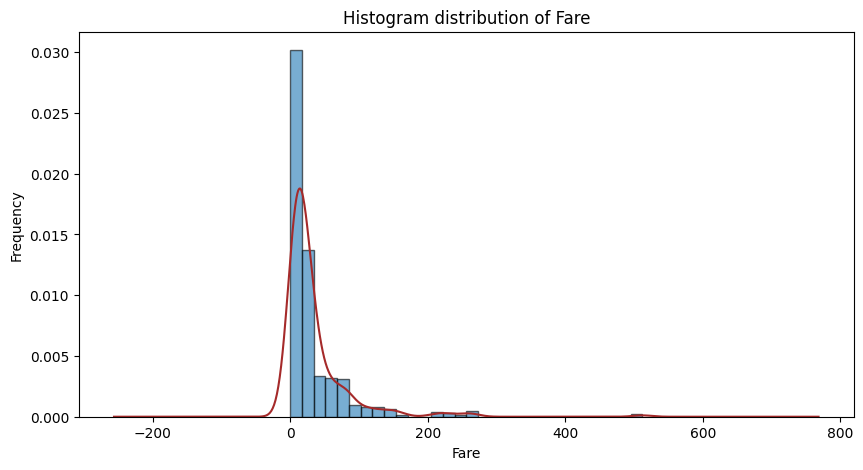

In [148]:
fig, ax = plt.subplots(figsize=(10, 5))
df_handled_missing_values['fare'].plot(kind='hist', bins=30, edgecolor='black', alpha = 0.6, ax = ax, density = True)
df_handled_missing_values['fare'].plot(kind = 'kde', color = 'brown', ax=ax)
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
ax.set_title('Histogram distribution of Fare')
plt.show()

From the plots, it can seen that, both the plots are roughly normally distributed. 

### **6. Check for outliers**

#### **6.1 Box plot to identify outliers**

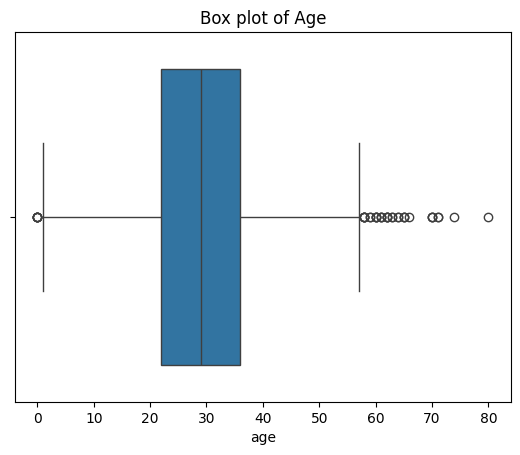

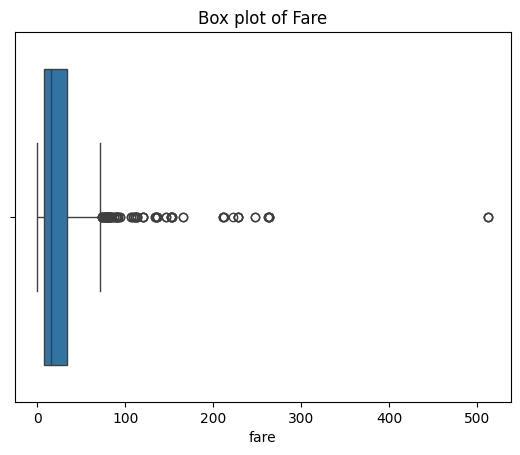

In [149]:
sns.boxplot(x = df_handled_missing_values['age'])
plt.title('Box plot of Age')
plt.show()

sns.boxplot(x = df_handled_missing_values['fare'])
plt.title('Box plot of Fare')
plt.show()

#### **6.2 IQR method**

In [150]:
# IQR method to detect outliers in 'age' column
q1 = df_handled_missing_values['age'].quantile(0.25)
q3 = df_handled_missing_values['age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_age = df_handled_missing_values[(df_handled_missing_values['age'] < lower_bound) | (df_handled_missing_values['age'] > upper_bound)]

print(f"Outliers in 'age' column:\n{outliers_age.head(10)}\n")
print(f"Number of outliers in 'age' column: {len(outliers_age)}")
print(f"Percentage of outliers in 'age' column: {len(outliers_age) / len(df_handled_missing_values) * 100:.2f}%\n")

Outliers in 'age' column:
     survived     sex  age  sibsp  parch      fare   class  embark_town  alone
11          1  female   58      0      0   26.5500   First  Southampton   True
33          0    male   66      0      0   10.5000  Second  Southampton   True
54          0    male   65      0      1   61.9792   First    Cherbourg  False
78          1    male    0      0      2   29.0000  Second  Southampton  False
94          0    male   59      0      0    7.2500   Third  Southampton   True
96          0    male   71      0      0   34.6542   First    Cherbourg   True
116         0    male   70      0      0    7.7500   Third   Queenstown   True
170         0    male   61      0      0   33.5000   First  Southampton   True
195         1  female   58      0      0  146.5208   First    Cherbourg   True
232         0    male   59      0      0   13.5000  Second  Southampton   True

Number of outliers in 'age' column: 39
Percentage of outliers in 'age' column: 4.97%



In [151]:
# IQR method to detect outliers in 'fare' column
q1 = df_handled_missing_values['fare'].quantile(0.25)
q3 = df_handled_missing_values['fare'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_fare = df_handled_missing_values[(df_handled_missing_values['fare'] < lower_bound) | (df_handled_missing_values['fare'] > upper_bound)]

print(f"Outliers in 'fare' column:\n{outliers_fare.head(10)}\n")
print(f"Number of outliers in 'fare' column: {len(outliers_fare)}")
print(f"Percentage of outliers in 'fare' column: {len(outliers_fare) / len(df_handled_missing_values) * 100:.2f}%\n")

Outliers in 'fare' column:
     survived     sex  age  sibsp  parch      fare   class  embark_town  alone
27          0    male   19      3      2  263.0000   First  Southampton  False
31          1  female   29      1      0  146.5208   First    Cherbourg  False
34          0    male   28      1      0   82.1708   First    Cherbourg  False
52          1  female   49      1      0   76.7292   First    Cherbourg  False
61          1  female   38      0      0   80.0000   First  Southampton   True
62          0    male   45      1      0   83.4750   First  Southampton  False
72          0    male   21      0      0   73.5000  Second  Southampton   True
88          1  female   23      3      2  263.0000   First  Southampton  False
102         0    male   21      0      1   77.2875   First  Southampton  False
118         0    male   24      0      1  247.5208   First    Cherbourg  False

Number of outliers in 'fare' column: 102
Percentage of outliers in 'fare' column: 13.01%



#### **6.3 Z score**

Z = x - mu/sigma

if |Z| > 3 -> then it is an outlier

In [152]:
zscore_age = stats.zscore(df_handled_missing_values['age'])
outliers_age_z = df_handled_missing_values[np.abs(zscore_age) > 3]

print(f"Outliers in 'age' column using Z-score:\n{outliers_age_z.head(10)}\n")
print(f"Number of outliers in 'age' column using Z-score: {len(outliers_age_z)}")
print(f"Percentage of outliers in 'age' column using Z-score: {len(outliers_age_z) / len(df_handled_missing_values) * 100:.2f}%\n")

Outliers in 'age' column using Z-score:
     survived   sex  age  sibsp  parch     fare  class  embark_town  alone
96          0  male   71      0      0  34.6542  First    Cherbourg   True
493         0  male   71      0      0  49.5042  First    Cherbourg   True
630         1  male   80      0      0  30.0000  First  Southampton   True
851         0  male   74      0      0   7.7750  Third  Southampton   True

Number of outliers in 'age' column using Z-score: 4
Percentage of outliers in 'age' column using Z-score: 0.51%



In [153]:
zscore_fare = stats.zscore(df_handled_missing_values['fare'])
outliers_fare_z = df_handled_missing_values[np.abs(zscore_fare) > 3]

print(f"Outliers in 'fare' column using Z-score:\n{outliers_fare_z.head(10)}\n")
print(f"Number of outliers in 'fare' column using Z-score: {len(outliers_fare_z)}")
print(f"Percentage of outliers in 'fare' column using Z-score: {len(outliers_fare_z) / len(df_handled_missing_values) * 100:.2f}%\n")

Outliers in 'fare' column using Z-score:
     survived     sex  age  sibsp  parch      fare  class  embark_town  alone
27          0    male   19      3      2  263.0000  First  Southampton  False
88          1  female   23      3      2  263.0000  First  Southampton  False
118         0    male   24      0      1  247.5208  First    Cherbourg  False
258         1  female   35      0      0  512.3292  First    Cherbourg   True
299         1  female   50      0      1  247.5208  First    Cherbourg  False
311         1  female   18      2      2  262.3750  First    Cherbourg  False
341         1  female   24      3      2  263.0000  First  Southampton  False
377         0    male   27      0      2  211.5000  First    Cherbourg  False
380         1  female   42      0      0  227.5250  First    Cherbourg   True
438         0    male   64      1      4  263.0000  First  Southampton  False

Number of outliers in 'fare' column using Z-score: 20
Percentage of outliers in 'fare' column using 

From the above methods, it can seen that 

**For 'Age' column:**

Outliers percentage using IQR method -> 4.97% 

Outliers percentage using Z-score method -> 0.51%


**For 'Fare' column:**

Outliers percentage using IQR method -> 13.01% 

Outliers percentage using Z-score method -> 2.55%


The difference is because IQR method is non parametric and it makes no assumption about the data distribution. It is more sensitve to skewed outliers and captures more outliers.

The Z-score on the otherhand is parametric, assumes data is roughly normally distributed and bell shaped. It is less sensitive to outliers and misses some extreme outliers unlike IQR.

Since the data for both columns are normally distributed, we'll go ahead with Z-Score method of outlier calculation. If it had been skewed, we would've proceeded with IQR method or a robust Z-score mothod.

In [154]:
df_handled_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     784 non-null    int64  
 1   sex          784 non-null    object 
 2   age          784 non-null    int64  
 3   sibsp        784 non-null    int64  
 4   parch        784 non-null    int64  
 5   fare         784 non-null    float64
 6   class        784 non-null    object 
 7   embark_town  784 non-null    object 
 8   alone        784 non-null    bool   
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 55.9+ KB


Check if there are any outliers present in categorical columns

In [167]:
print(f"Value counts distribution for sex column {df_handled_missing_values['sex'].value_counts(normalize=True) * 100}")

Value counts distribution for sex column sex
male      62.627551
female    37.372449
Name: proportion, dtype: float64


In [168]:

print(f"Value counts distribution for sibsp column {df_handled_missing_values['sibsp'].value_counts(normalize=True) * 100}")

Value counts distribution for sibsp column sibsp
0    65.943878
1    25.637755
2     3.443878
4     2.295918
3     1.785714
5     0.637755
8     0.255102
Name: proportion, dtype: float64


In [169]:
print(f"Value counts distribution for parch column {df_handled_missing_values['parch'].value_counts(normalize=True) * 100}")

Value counts distribution for parch column parch
0    73.979592
1    14.540816
2     9.566327
5     0.637755
3     0.637755
4     0.510204
6     0.127551
Name: proportion, dtype: float64


In parch column, the value 6 could be an outlier. Let's check the actual count.

In [ ]:
print(f"Value counts distribution for parch column {df_handled_missing_values['parch'].value_counts()}")

Value counts distribution for parch column sibsp
0    517
1    201
2     27
4     18
3     14
5      5
8      2
Name: count, dtype: int64


It can be seen above that the value 6 is occuring once. This could be a potential outlier.

Similarly, value 8 in 'sibsp' column has a very low percentage of occurence.

In [171]:

print(f"Value counts distribution for class column {df_handled_missing_values['class'].value_counts(normalize=True) * 100}")

Value counts distribution for class column class
Third     51.658163
First     27.295918
Second    21.045918
Name: proportion, dtype: float64


In [172]:

print(f"Value counts distribution for embark_town column {df_handled_missing_values['embark_town'].value_counts(normalize=True) * 100}")

Value counts distribution for embark_town column embark_town
Southampton    72.704082
Cherbourg      19.770408
Queenstown      7.525510
Name: proportion, dtype: float64


In [173]:
print(f"Value counts distribution for alone column {df_handled_missing_values['alone'].value_counts(normalize=True) * 100}")

Value counts distribution for alone column alone
True     56.887755
False    43.112245
Name: proportion, dtype: float64


Lets observe the outliers and decide if it needs to be retained or removed

In [181]:
df_cat_outlier = df_handled_missing_values[(df_handled_missing_values['sibsp'].isin([3,4,5,8])) | (df_handled_missing_values['parch'].isin([3,4,5,6]))]

print(f"Percentage of outliers in categorical columns (sibsp and parch): {len(df_cat_outlier) / len(df_handled_missing_values) * 100:.2f}%")

Percentage of outliers in categorical columns (sibsp and parch): 6.89%


In [185]:
df_cat_outlier.sample(10)

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
27,0,male,19,3,2,263.0000,First,Southampton,False
850,0,male,4,4,2,31.2750,Third,Southampton,False
480,0,male,9,5,2,46.9000,Third,Southampton,False
68,1,female,17,4,2,7.9250,Third,Southampton,False
678,0,female,43,1,6,46.9000,Third,Southampton,False
50,0,male,7,4,1,39.6875,Third,Southampton,False
610,0,female,39,1,5,31.2750,Third,Southampton,False
824,0,male,2,4,1,39.6875,Third,Southampton,False
634,0,female,9,3,2,27.9000,Third,Southampton,False
59,0,male,11,5,2,46.9000,Third,Southampton,False


In [183]:
df_handled_missing_values[(df_handled_missing_values['sibsp'].isin([8])) | (df_handled_missing_values['parch'].isin([6]))]

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
159,0,male,29,8,2,69.55,Third,Southampton,False
180,0,female,29,8,2,69.55,Third,Southampton,False
678,0,female,43,1,6,46.90,Third,Southampton,False


In [ ]:
df_cat_outlier.sort_values(by = 'fare', ascending = False)

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
341,1,female,24,3,2,263.0000,First,Southampton,False
27,0,male,19,3,2,263.0000,First,Southampton,False
438,0,male,64,1,4,263.0000,First,Southampton,False
88,1,female,23,3,2,263.0000,First,Southampton,False
180,0,female,29,8,2,69.5500,Third,Southampton,False
159,0,male,29,8,2,69.5500,Third,Southampton,False
71,0,female,16,5,2,46.9000,Third,Southampton,False
386,0,male,1,5,2,46.9000,Third,Southampton,False
678,0,female,43,1,6,46.9000,Third,Southampton,False
683,0,male,14,5,2,46.9000,Third,Southampton,False


It can be observed that there are some records like index 13 and 610 have all the other columns same but only the 'sex' changes.
The data authenticity is questionable as this will yield in poor model performance.

But since we focus on data pre-processing in this notebook, we just focus on those steps.

Percentage of outliers among categorical variables is around 7%. We decide to keep it as this might add information while model training.

In case of poor performance, try removing these outliers and train.

Note: The assumption is that, we ignore data authenticity as pointed above.

### **7. Feature Encoding**

In [186]:
X = df_handled_missing_values.drop(columns = 'survived', axis = 1)
y = df_handled_missing_values['survived']

print(f"Shape of feature set X: {X.shape}")
print(f"Shape of target variable y: {y.shape}")

Shape of feature set X: (784, 8)
Shape of target variable y: (784,)


Split the data into train and test with test size of 20%

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

In [191]:
num_features = X.select_dtypes(include = ["int64", "float64"]).columns
cat_features = X.select_dtypes(include = ["object", "category"]).columns

num_transformer = Pipeline(
    steps = [
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps = [
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop = 'first'))
    ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ('numeric_features', num_transformer, num_features),
        ('categorical_features', cat_transformer, cat_features)
    ]
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

Since the target label is just 0 and 1 already, we needn't encode it.

### **8. Check for multicollinearity**

In [197]:
encoded_feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(X_train_encoded, columns = encoded_feature_names)

X_train_df.head(5)

,numeric_features__age,numeric_features__sibsp,numeric_features__parch,numeric_features__fare,categorical_features__sex_male,categorical_features__class_Second,categorical_features__class_Third,categorical_features__embark_town_Queenstown,categorical_features__embark_town_Southampton
0,-0.828891,-0.528702,1.841387,0.886540,0.0,0.0,0.0,0.0,1.0
1,1.064158,-0.528702,-0.495758,-0.103313,0.0,0.0,0.0,0.0,0.0
2,-0.027986,-0.528702,0.672815,0.416672,0.0,0.0,0.0,0.0,1.0
3,-0.027986,1.387461,-0.495758,-0.188533,1.0,0.0,1.0,1.0,0.0
4,-0.756081,-0.528702,-0.495758,-0.136114,0.0,1.0,0.0,0.0,1.0


#### **8.1. Correlation Matrix**

In [ ]:
corr_mat = X_train_df.corr()

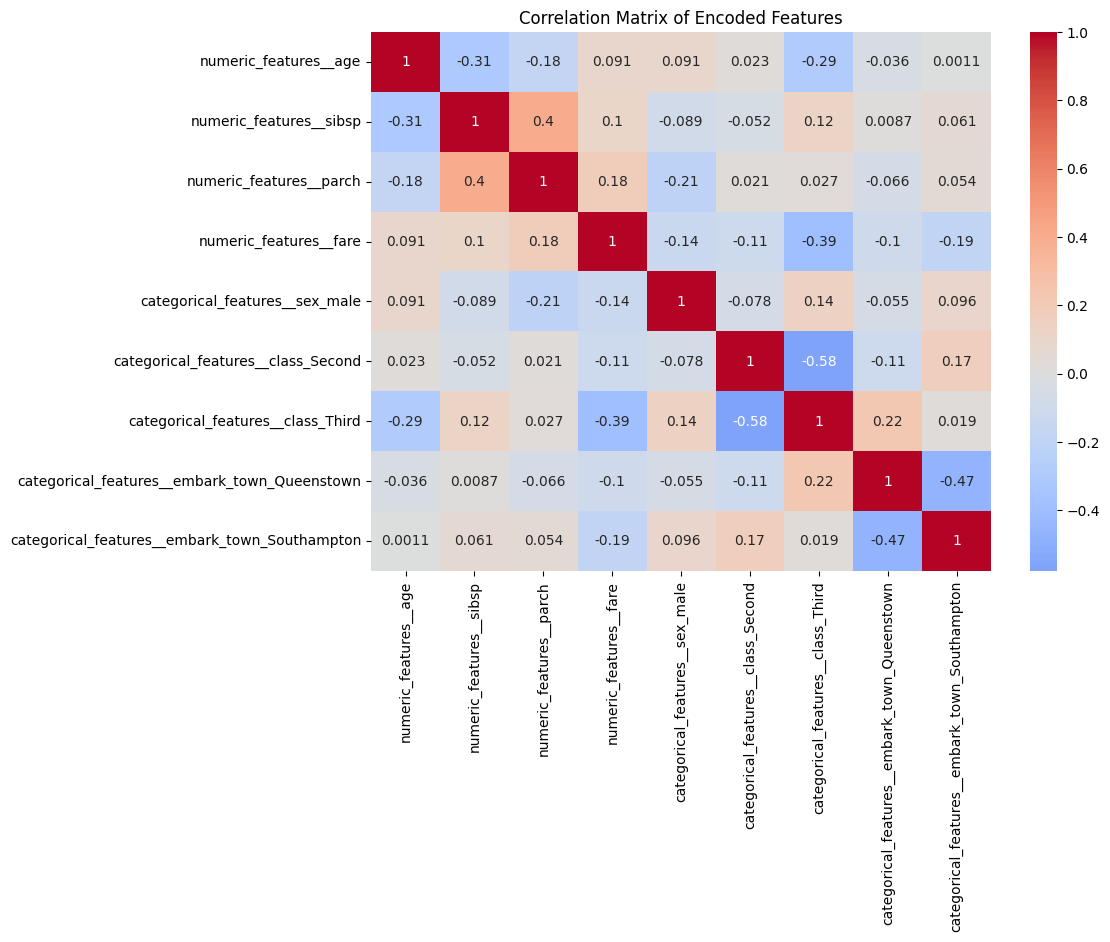

In [201]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_mat, annot=True, cmap = 'coolwarm', center = 0)
plt.title('Correlation Matrix of Encoded Features')
plt.show()

From the heatmap, it can be observed that the encoded features 'categorical_features_class_Second' and 'categorical_features_class_Third' are strongly negatively correlated (-0.58). We'll double check with VIF. 

Normally a variable shall be removed if the absolute value is greater than 0.7

#### **8.2. VIF**

In [207]:
vif_df = pd.DataFrame()
vif_df['feature'] = X_train_df.columns
vif_df['vif'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif_df.sort_values(by = 'vif', ascending=False))

                                         feature       vif
6              categorical_features__class_Third  4.044134
8  categorical_features__embark_town_Southampton  3.913108
4                 categorical_features__sex_male  2.648222
5             categorical_features__class_Second  2.026810
7   categorical_features__embark_town_Queenstown  1.419761
1                        numeric_features__sibsp  1.302296
2                        numeric_features__parch  1.294824
0                          numeric_features__age  1.249720
3                         numeric_features__fare  1.234549


All the features have vif value less than 5. Therefore there are no major correlation among the variables

### **9. Check for class imbalance**

In [210]:
df_handled_missing_values['survived'].value_counts()

survived
0    461
1    323
Name: count, dtype: int64

The above output shows that the classes aren't imbalanced.

The data is now suitable for modeling!!